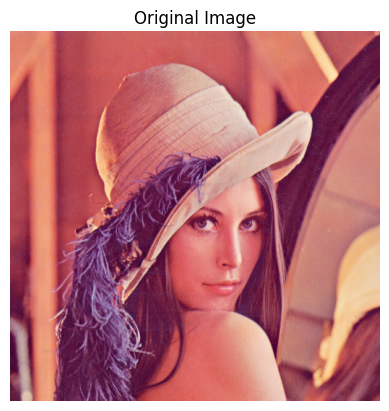

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (upload your own or use a default one)
image = cv2.imread('/content/Lena_Image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

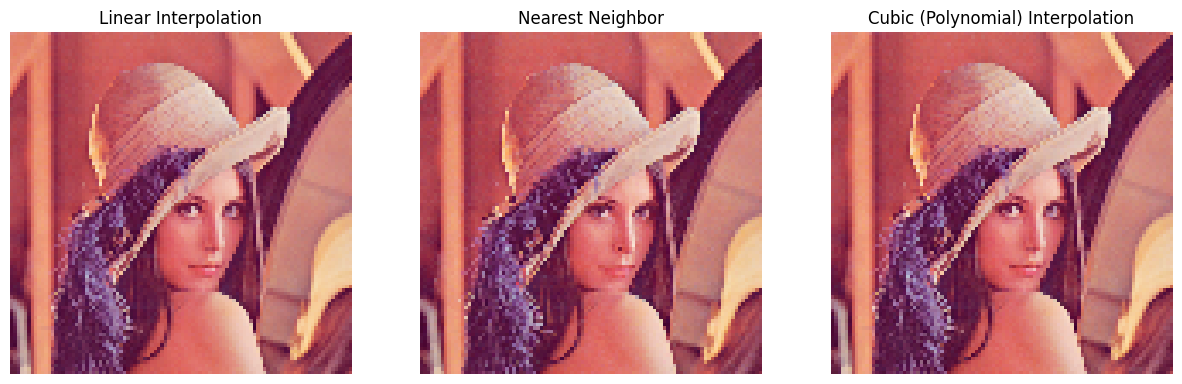

In [ ]:
# Resize using Linear Interpolation
resized_linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)

# Resize using Nearest Neighbor Interpolation
resized_nearest = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)

# Resize using Cubic Interpolation (Polynomial)
resized_cubic = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# Display Resized Images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(resized_linear)
axes[0].set_title("Linear Interpolation")
axes[0].axis("off")

axes[1].imshow(resized_nearest)
axes[1].set_title("Nearest Neighbor")
axes[1].axis("off")

axes[2].imshow(resized_cubic)
axes[2].set_title("Cubic (Polynomial) Interpolation")
axes[2].axis("off")

plt.show()


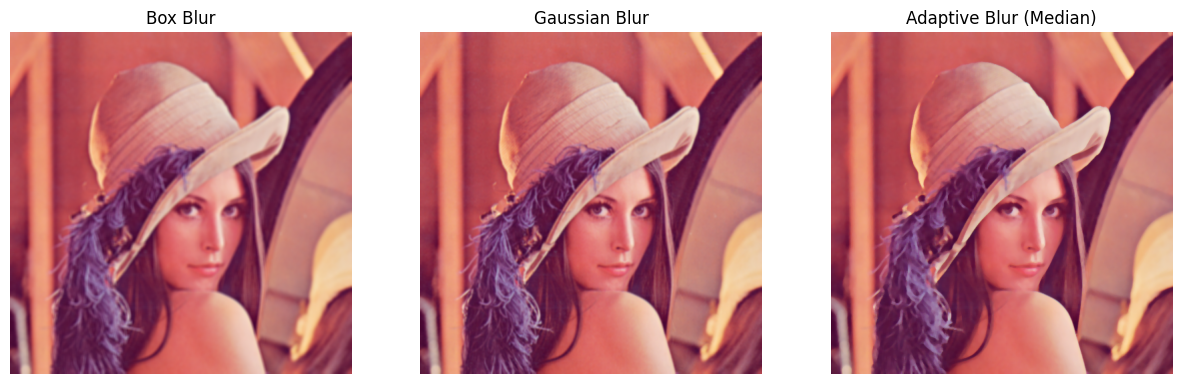

In [ ]:
# Apply Box Blurring
box_blur = cv2.blur(image, (5, 5))

# Apply Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Median Blurring (Adaptive)
adaptive_blur = cv2.medianBlur(image, 5)

# Display Blurred Images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(box_blur)
axes[0].set_title("Box Blur")
axes[0].axis("off")

axes[1].imshow(gaussian_blur)
axes[1].set_title("Gaussian Blur")
axes[1].axis("off")

axes[2].imshow(adaptive_blur)
axes[2].set_title("Adaptive Blur (Median)")
axes[2].axis("off")

plt.show()


In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (28x28 -> 784 features)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Split into 80% train, 20% test
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define models
models = {
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(kernel="linear", probability=True)
}

# Perform K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy").mean()
    precision = cross_val_score(model, X_train, y_train, cv=kf, scoring="precision_macro").mean()
    recall = cross_val_score(model, X_train, y_train, cv=kf, scoring="recall_macro").mean()
    f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1_macro").mean()

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


In [ ]:
# Train best model (SVM in this case)
best_model = SVC(kernel="linear", probability=True)
best_model.fit(X_train, y_train)

# Predict on validation set
y_pred = best_model.predict(X_valid)
y_prob = best_model.predict_proba(X_valid)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_valid, y_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()